-----
# OLS Regression
----

## Set Up
----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
sys.path.append('../../src')

from linear_utils import Linear_Model_Builder  

## Data Loading
------

In [3]:
car_df = pd.read_csv('../../data/car_data_processed.csv', index_col = 0)

In [4]:
car_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,peakrpm,citympg,...,is_six_cylinder,is_three_cylinder,is_two_cylinder,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.519071,-1.839377,-0.288349,-0.262960,-0.646553,...,0,0,0,0,0,0,0,0,1,0
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.519071,-1.839377,-0.288349,-0.262960,-0.646553,...,0,0,0,0,0,0,0,0,1,0
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,-2.404880,0.685946,-0.288349,-0.262960,-0.953012,...,1,0,0,0,0,0,0,0,1,0
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.517266,0.462183,-0.035973,0.787855,-0.186865,...,0,0,0,0,0,0,0,0,1,0
4,0.107110,0.207256,0.230001,0.235942,0.516807,-0.517266,0.462183,-0.540725,0.787855,-1.106241,...,0,0,0,0,0,0,0,0,1,0


### Split independent variables (X) and target variable (y)

In [5]:
y = car_df['price_transformed']

X = car_df.drop(columns='price_transformed')

In [6]:
X.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'citympg',
       'highwaympg', 'enginesize_transformed', 'horsepower_transformed',
       'symboling_-1', 'symboling_-2', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'is_gas', 'is_turbo', 'has_four_doors',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'is_front_wheel_drive', 'is_rear_wheel_drive',
       'is_front_engine', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'is_eight_cylinder', 'is_five_cylinder', 'is_four_cylinder',
       'is_six_cylinder', 'is_three_cylinder', 'is_two_cylinder',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi'],
      dtype='object')

## Check Assumption 1
-----
**Assumption 1:**
A linear relationship between X (independent variable/s) and y (dependent variable)

In [7]:
X.shape


(204, 48)

### First sepearte out dummy varirables from non-dummy variables TO REDO VODE

In [8]:
dummy_cols = []
non_dummy_cols = []

# Iterate through each column to check unique values
for col in X.columns:
    if X[col].nunique() == 2 and set(X[col].unique()) <= {0, 1}:  # Check if column has exactly two unique values (0 and 1)
        dummy_cols.append(col)
    else:
        non_dummy_cols.append(col)

### Looking at relationship with y for non-dummied vars 

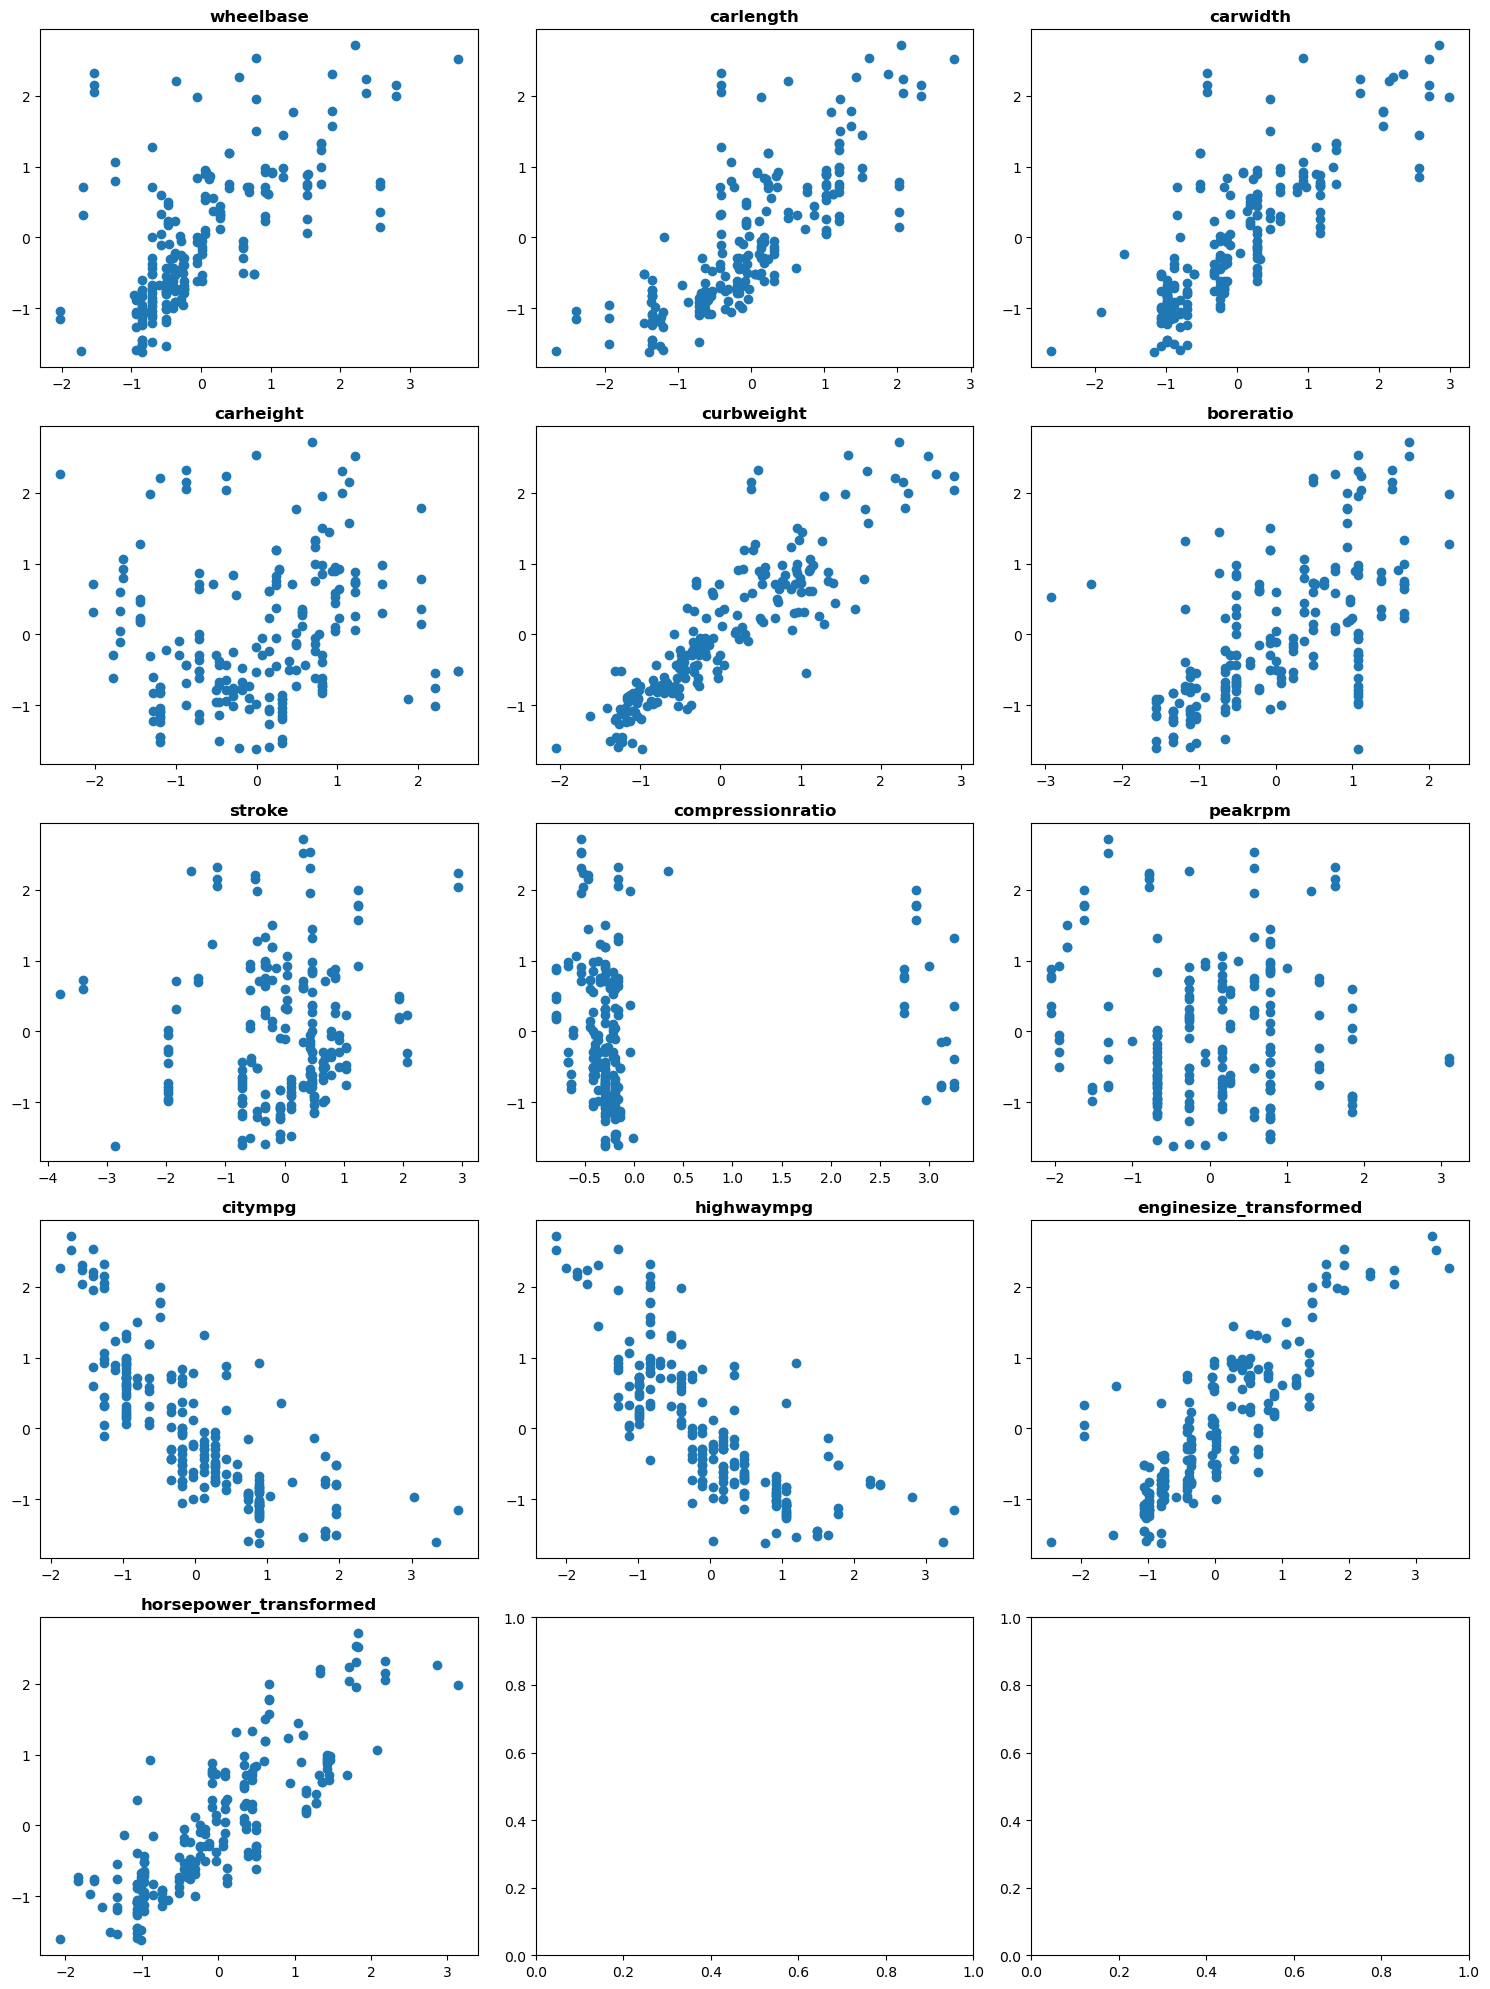

In [9]:
plt.subplots(5,3, figsize=(15,20))

for i,col in enumerate(non_dummy_cols):
    plt.subplot(5,3,i+1)
    plt.scatter(X[col],  y)
    plt.title(col, fontweight= 'bold')
plt.tight_layout()
plt.show()


#TODO: ADD IN COMMENTS

### Looking at relationship with y for dummied vars 

In [110]:
not_encode = pd.read_csv('../../data/car_data_not_encoded.csv', index_col=0,
                         )

In [111]:
not_encode['symboling'] = not_encode['symboling'].astype(str)

In [112]:
cat_cols = not_encode.select_dtypes(include='object').columns

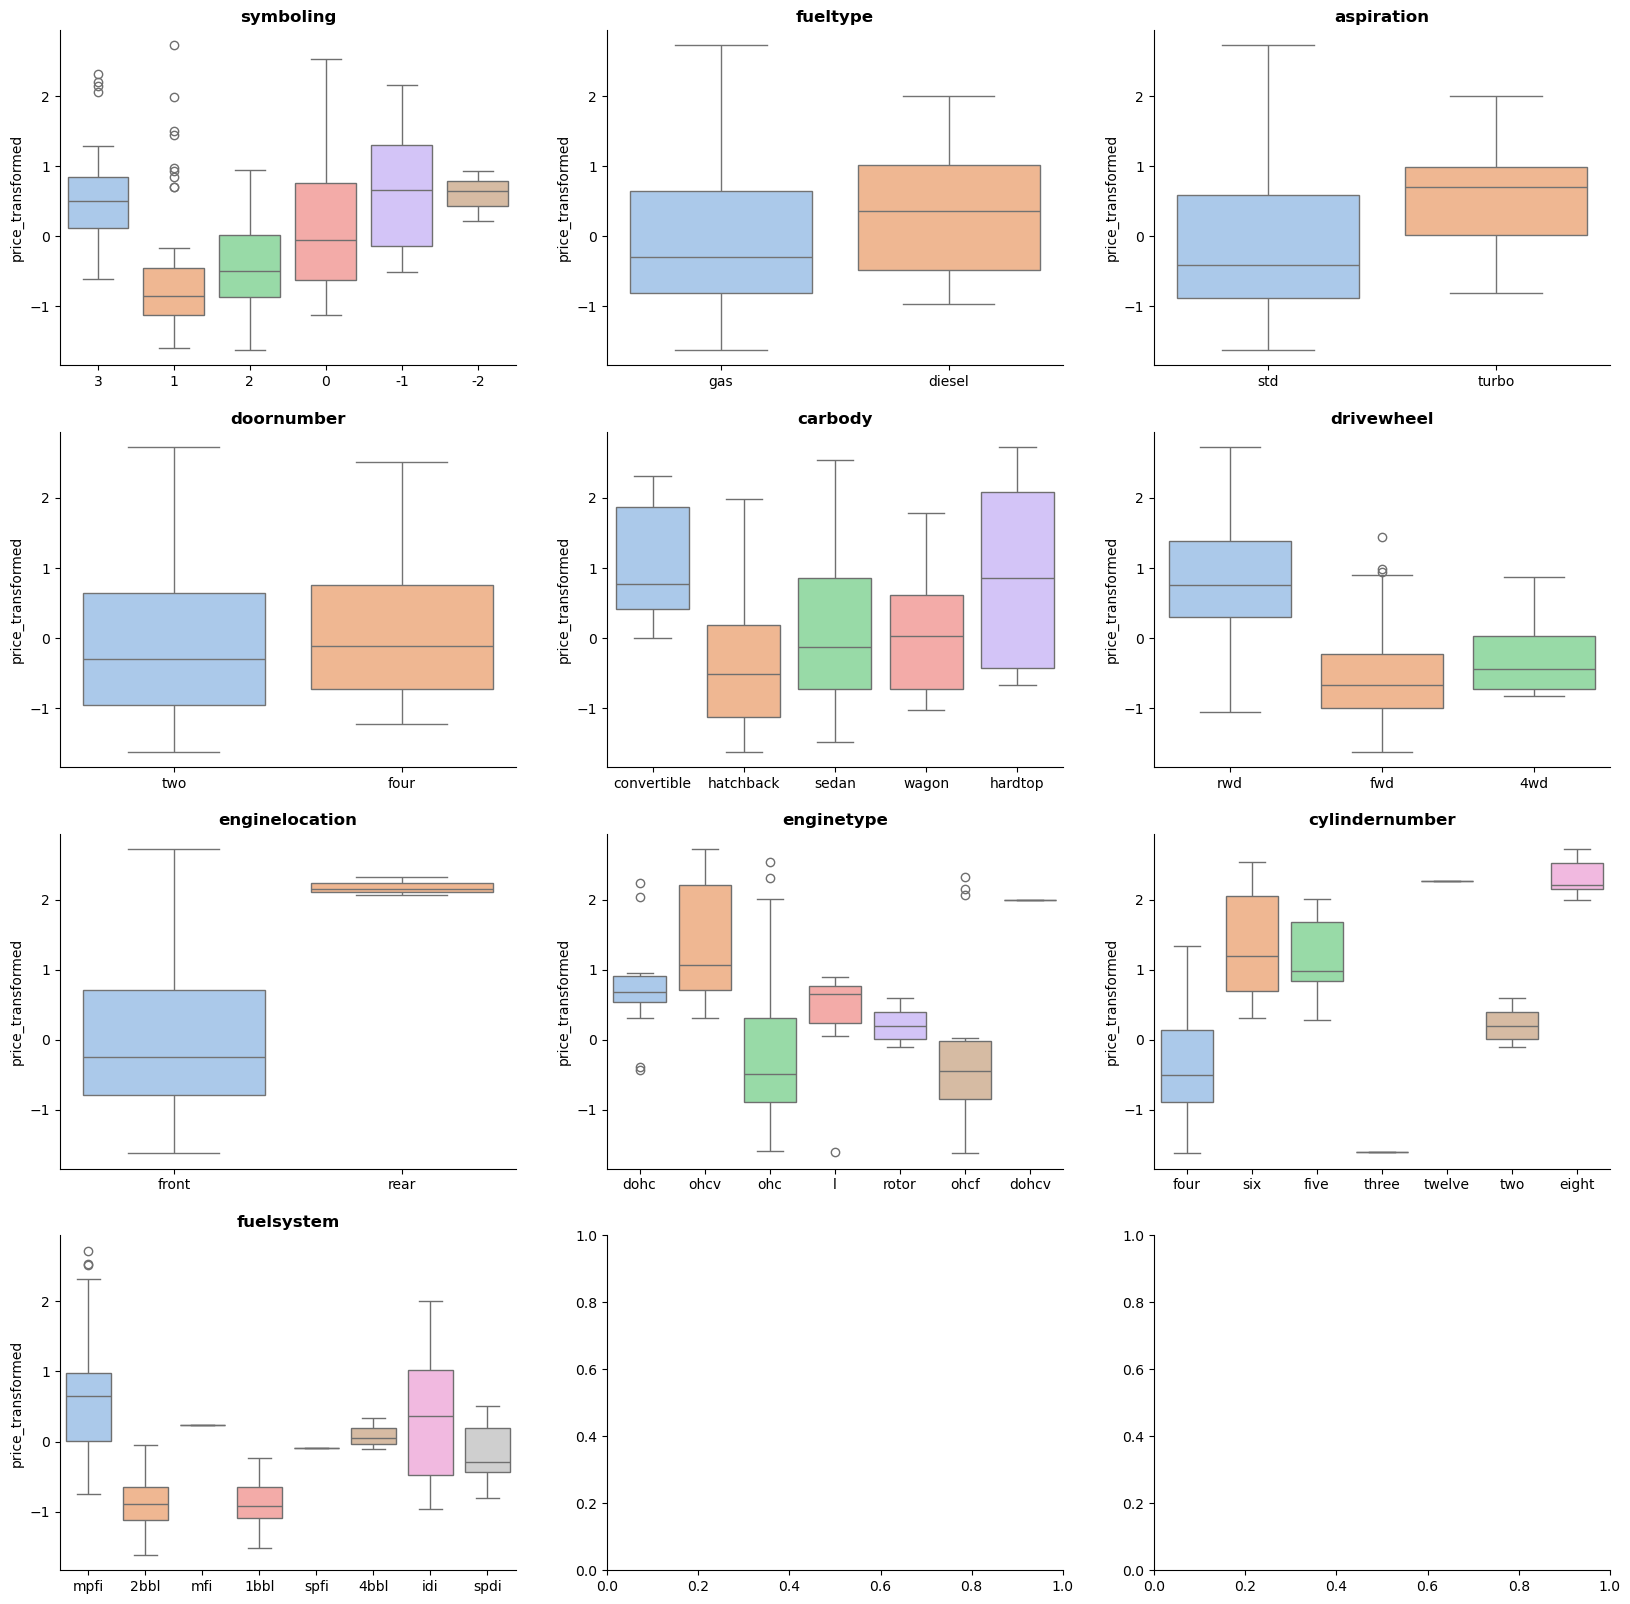

In [116]:
plt.subplots(4,3, figsize=(20,20))

for i,col in enumerate(cat_cols):
    plt.subplot(4,3,i+1)
    sns.boxplot(not_encode, x =col, y = 'price_transformed', hue = col, palette='pastel')  
    sns.despine()
    plt.xlabel('')
    plt.title(col, fontweight= 'bold')


plt.show()

**Comments:**

#TODO Add comments

- **symboling** 

- **fuel type**

- **aspiration**

- **door number**

- **car body**

- **drive wheel**

- **engine location**

- **engine type**

- **cylinder number**

- **fuel system** 


## Check Assumption 2

**Assumption 2:**

Independent variables are independent to each other, there is no colinearity or multicollinearity.

### Confusion Matrix - Colinearity 

### VIF - Multicollinearity

## Build Linear Regression Stats Model

## Check Assumption 3 = perhaps to  do in 04

## Check Assumption 4 = perhaps to  do in 04